In [6]:
import pandas as pd

df1 = pd.read_csv('patriot45_Alex2.0.csv')[:499]
df2 = pd.read_csv('HT.csv',encoding='latin1')[:151]
df3 = pd.read_csv('DrVinnie.csv',encoding='latin1')[:151]
df4 = pd.read_csv('FeelLucky.csv',encoding='latin1')[:151]
df5 = pd.read_csv('Acaciavet.csv',encoding='latin1')[:151]
df6 = pd.read_csv('mike_radant.csv',encoding='latin1')[:151]
df7 = pd.read_csv('TheGrandAdmiral.csv',encoding='latin1')[:151]
df8 = pd.read_csv('disrespekt.csv',encoding='latin1')[:151]
df9 = pd.read_csv('Pouncekitty.csv',encoding='latin1')[:151]
df10 = pd.read_csv('Reese_Witheredpoon.csv',encoding='latin1')[:151]

df = pd.concat([df1,df2,df3,df4,df5,
               df6,df7,df8,df9,df10])

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

cleaned_date = []

for date in df['Article Date'].values.tolist():
    
    if str(date)[-4:-3] and int(str(date)[-4:-3]) > 3:
        #print(str(date)[2:-4] + '0' + str(date)[-4:-3])
        cleaned_date.append( str(date)[2:-4] + '0' + str(date)[-4:-3] )
        
    else:
        cleaned_date.append( str(date)[2:-2] )

    
df['cleaned_date'] = cleaned_date
df['cleaned_date'] = pd.to_datetime(df.cleaned_date)

# Hate and offensive dataframes
hateDF = df.loc[df['Hate?'] == 1.0]
offensiveDF = df.loc[df['Hate?'] == 2.0]
ordinaryDF = df.loc[df['Hate?'] == 0.0]

hate_dates = hateDF['cleaned_date']#.values.tolist()
hate_vol = hateDF['Hate?']

offensive_dates = offensiveDF['cleaned_date']
offensive_vol = offensiveDF['Hate?']

ordinary_dates = ordinaryDF['cleaned_date']
ordinary_vol = ordinaryDF['Hate?']

hateDF['cleaned_date'] = pd.to_datetime(hateDF.cleaned_date)
offensiveDF['cleaned_date'] = pd.to_datetime(offensiveDF.cleaned_date)
ordinaryDF['cleaned_date'] = pd.to_datetime(ordinaryDF.cleaned_date)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

# Fluctuations in Volume

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


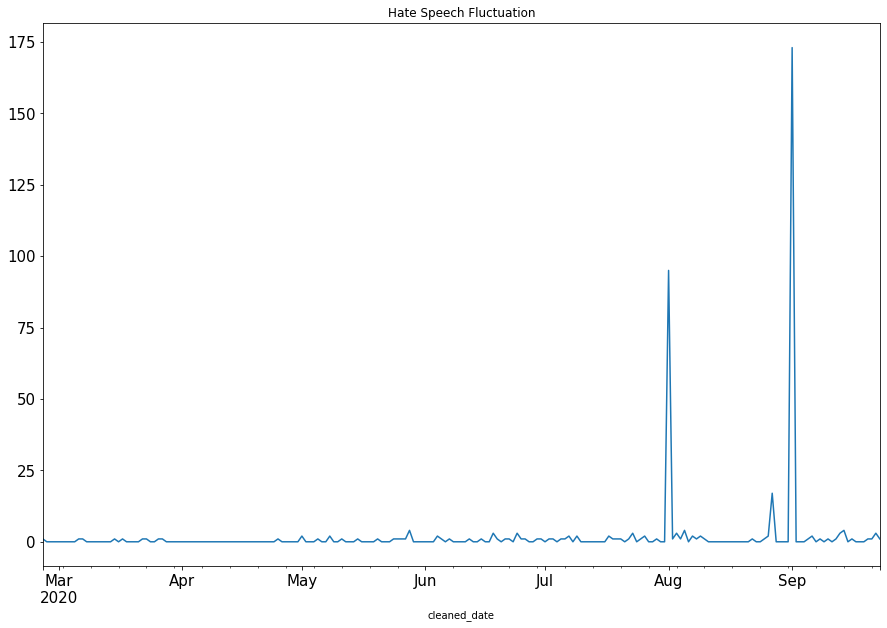

In [9]:
hate_dates = hateDF['cleaned_date']#.values.tolist()

hateDF['cleaned_date'] = pd.to_datetime(hateDF.cleaned_date)
df99 = hateDF.set_index('cleaned_date').resample('D').size()
#figsize = 20,10
df99.plot(figsize=(15,10), title='Hate Speech Fluctuation', fontsize=15)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


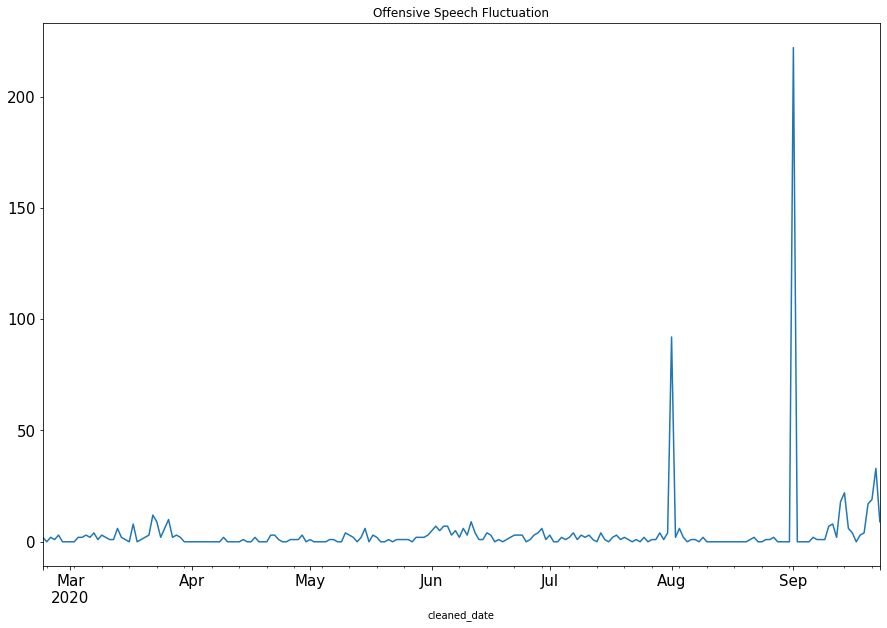

In [4]:
offensive_dates = offensiveDF['cleaned_date']#.values.tolist()

offensiveDF['cleaned_date'] = pd.to_datetime(offensiveDF.cleaned_date)
df99 = offensiveDF.set_index('cleaned_date').resample('D').size()
#figsize = 20,10
df99.plot(figsize=(15,10), title='Offensive Speech Fluctuation', fontsize=15)

# Proportion of Hate Speech to Total Volume

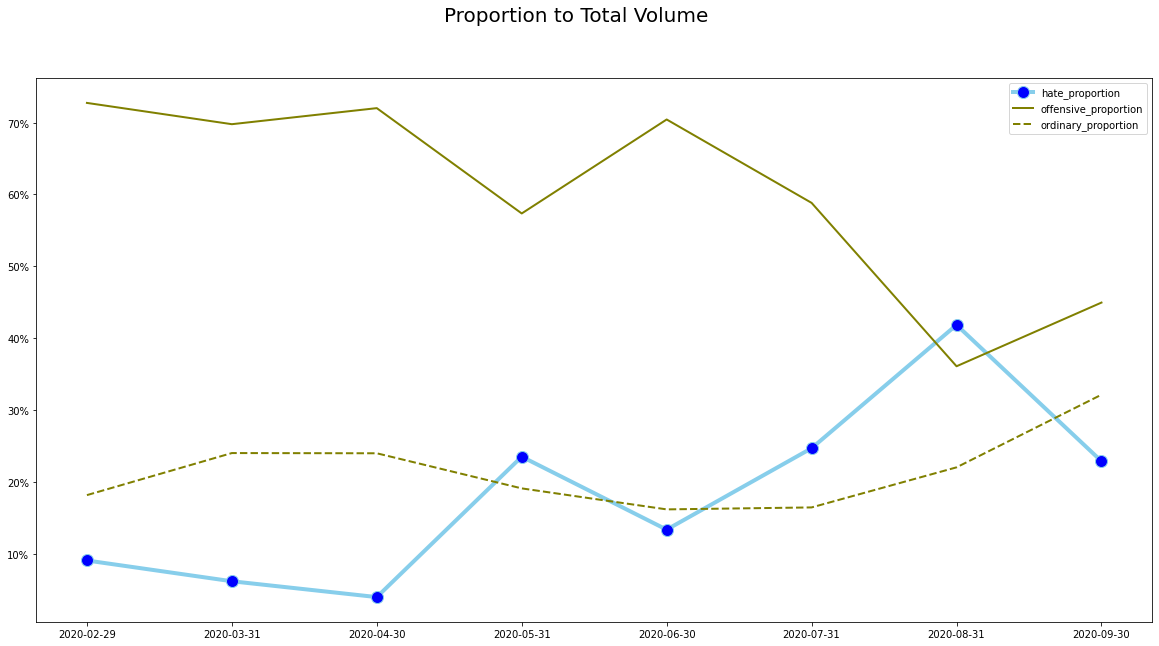

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df_hate = hateDF.set_index('cleaned_date').resample('M').size()
df_offens = offensiveDF.set_index('cleaned_date').resample('M').size()
df_ord = ordinaryDF.set_index('cleaned_date').resample('M').size()
df_total = df.set_index('cleaned_date').resample('M').size()

hate = df_hate.values.tolist()
offensive = df_offens.values.tolist()
ordinary = df_ord.values.tolist()

hate_prop = []
offens_prop = []
ord_prop = []
for i in range(len(hate)):
    hate_monthly = (hate[i] / (hate[i] + offensive[i] + ordinary[i]) ) * 100
    offensive_monthly = (offensive[i] / (hate[i] + offensive[i] + ordinary[i])) * 100
    ordinary_monthly = (ordinary[i] / (hate[i] + offensive[i] + ordinary[i])) * 100
    hate_prop.append(hate_monthly)
    offens_prop.append(offensive_monthly)
    ord_prop.append(ordinary_monthly)

proportion_df = pd.DataFrame()
proportion_df['date'] = [str(i) for i in df_hate.index]
proportion_df['date'] = pd.to_datetime(HATE['date']).dt.strftime('%Y-%m-%d')
proportion_df['hate_proportion'] = hate_prop
proportion_df['offensive_proportion'] = offens_prop
proportion_df['ordinary_proportion'] = ord_prop

fig = plt.figure(figsize=(20,10))
plt.plot( 'date', 'hate_proportion', data=proportion_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'date', 'offensive_proportion', data=proportion_df, marker='', color='olive', linewidth=2)
plt.plot( 'date', 'ordinary_proportion', data=proportion_df, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()

#plt.plot(x,y)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('Proportion to Total Volume', fontsize=20)
plt.show()